# Green patents issuance correlation with extreme weather events

In [814]:
# %pip install xlrd
# %pip isntall openpyxl

In [815]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DATA IMPORT

In [816]:
# NUmber of countries per dataset
# GDP cap = 266

# FDI_WB = 266

# cata = 218

# governement = 217

# climate awareness == 111

# patents_PCT = 102

# count (patience) = 76

In [817]:
#Import country (https://www.briq-institute.org/global-preferences/downloads)
count = pd.read_stata("country.dta")

#Import extreme weather event dataset (https://www.emdat.be/)
cata = pd.read_excel("elephant_emdat_custom.xlsx")

#Import Patents datasets from OECD (https://stats.oecd.org/ --> Science, Technology and Patents/Patents Statistics/Patents by technology/Patents in environment-related technologies"
# patent = pd.read_csv("PATS_IPC_25102023222244840.csv")
patents_PCT = pd.read_csv("applications PCT.csv")

In [818]:
#Import GDP per Cap World data bank
GDPCap =  pd.read_excel("GDPperCAP_WB.xls", header = 3)

In [819]:
#FDI from WB 266 coountries
FDI_WB = pd.read_csv("API_BX.KLT.DINV.CD.WD_DS2_en_csv_v2_5995288.csv", header = 2)

In [820]:
#import climate worriness dataset (https://dataforgood.facebook.com/dfg/tools/climate-change-opinion-survey)
climate_awareness = pd.read_excel("climate_change_opinion_survey_2022_aggregated.xlsx",sheet_name = "climate_worry")

In [821]:
#human development index
HDI =  pd.read_excel("HDR21-22_Statistical_Annex_HDI_Table.xlsx")

In [822]:
#import governement information
government = pd.read_csv("dd492d4b-981b-41c4-9e4a-5ea2e92d4ed4_Data.csv")

# DATA CLEANING

## Patience


In [823]:
#see what in the patience dataset
count.columns
count['country'] = count['country'].str.lower()
count.rename(columns={'country':'Country'}, inplace=True)

In [824]:
count = count[['Country','patience','risktaking']]

In [825]:
len(count['Country'].unique())

76

# Patents

In [826]:
patents_PCT['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Türkiye',
       'United Kingdom', 'United States', 'Algeria', 'Andorra',
       'Argentina', 'Armenia', 'Belarus', 'Bermuda',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cayman Islands',
       'Chile', "China (People's Republic of)", 'Colombia', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus',
       "Democratic People's Republic of Korea", 'Djibouti', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Georgia', 'Guatemala',
       'Hong Kong, China', 'India', 'Indonesia', 'Iran', 'Israel',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Latvia',
       'Lebanon', 'Liechtenstein', 'Lithuania', 'North Macedonia',
    

In [827]:
#first check for patent
patents_PCT.describe()

,TIME,Time,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
count,19750.000000,19750.000000,19750.0,0.0,0.0,19750.000000,0.0,0.0
mean,2010.148911,2010.148911,0.0,NaN,NaN,249.173886,NaN,NaN
std,6.664630,6.664630,0.0,NaN,NaN,2421.486606,NaN,NaN
min,1999.000000,1999.000000,0.0,NaN,NaN,0.000000,NaN,NaN
25%,2004.000000,2004.000000,0.0,NaN,NaN,0.000000,NaN,NaN
50%,2010.000000,2010.000000,0.0,NaN,NaN,1.000000,NaN,NaN
75%,2016.000000,2016.000000,0.0,NaN,NaN,15.000000,NaN,NaN
max,2021.000000,2021.000000,0.0,NaN,NaN,63766.802400,NaN,NaN


In [828]:
patents_PCT.columns

Index(['KINDPATENT', 'Patents Office & Patents Families', 'KINDCOUNTRY',
       'Reference country', 'LOCATION', 'Country', 'IPC',
       'Technology domains & IPC', 'KINDDATE', 'Reference Date', 'TIME',
       'Time', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [829]:
patents = patents_PCT[["Country", "Value", "Time"]].rename(columns={"Value":"patents_number"})

# Convert 'country' column to lowercase
patents['Country'] = patents['Country'].str.lower().astype('string')
patents


,Country,patents_number,Time
0,australia,1072.6167,1999
1,australia,1511.8500,2000
2,australia,1588.5951,2001
3,australia,1660.8345,2002
4,australia,1600.2333,2003
...,...,...,...
19745,zimbabwe,0.0000,2017
19746,zimbabwe,0.0000,2018
19747,zimbabwe,0.0000,2019
19748,zimbabwe,0.0000,2020


In [830]:
patents[patents['patents_number'] == 0]

,Country,patents_number,Time
690,algeria,0.0,1999
1080,democratic people's republic of korea,0.0,1999
1081,democratic people's republic of korea,0.0,2000
1082,democratic people's republic of korea,0.0,2001
1102,djibouti,0.0,1999
...,...,...,...
19745,zimbabwe,0.0,2017
19746,zimbabwe,0.0,2018
19747,zimbabwe,0.0,2019
19748,zimbabwe,0.0,2020


In [831]:
countries_with_zero_patents = patents.groupby('Country')['patents_number'].sum() == 0

# Extract the countries with zero patents for every year
countries_with_zero_patents = countries_with_zero_patents[countries_with_zero_patents].index.tolist()

print("Countries with always 0 patents: ", countries_with_zero_patents)

Countries with always 0 patents:  ['briics economies - brazil, russia, india, indonesia, china and south africa', 'djibouti']


In [832]:
# remove countries having always 0 patents 
patents = patents[~patents['Country'].isin(countries_with_zero_patents)]

In [833]:
patents

,Country,patents_number,Time
0,australia,1072.6167,1999
1,australia,1511.8500,2000
2,australia,1588.5951,2001
3,australia,1660.8345,2002
4,australia,1600.2333,2003
...,...,...,...
19745,zimbabwe,0.0000,2017
19746,zimbabwe,0.0000,2018
19747,zimbabwe,0.0000,2019
19748,zimbabwe,0.0000,2020


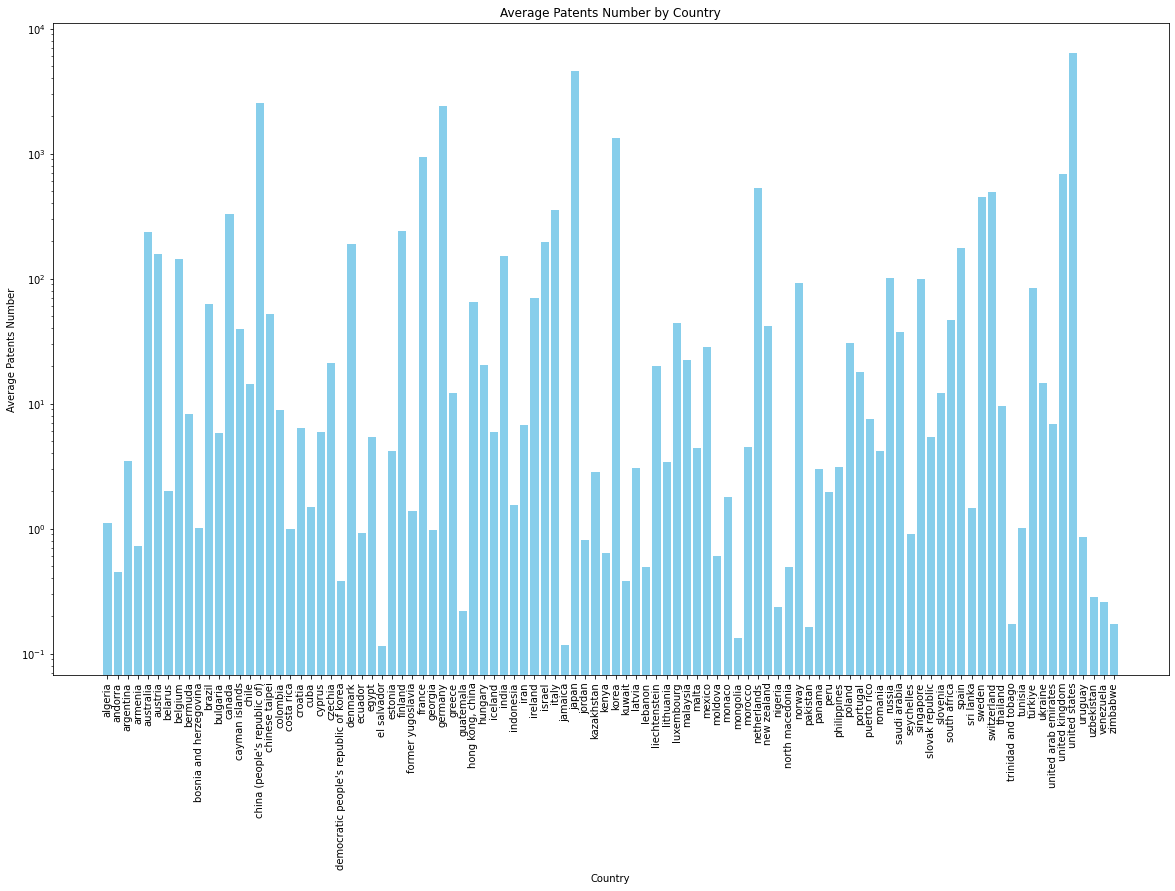

In [834]:
avg_patents_by_country = patents.groupby('Country')['patents_number'].mean().reset_index().dropna()

# Increase the figure size
plt.figure(figsize=(20, 12))

# Plot bar chart
plt.bar(avg_patents_by_country['Country'], avg_patents_by_country['patents_number'], color='skyblue')

plt.yscale('log')
# Set x-axis labels rotation
plt.xticks(rotation=90)

plt.title('Average Patents Number by Country')
plt.xlabel('Country')
plt.ylabel('Average Patents Number')
plt.show()

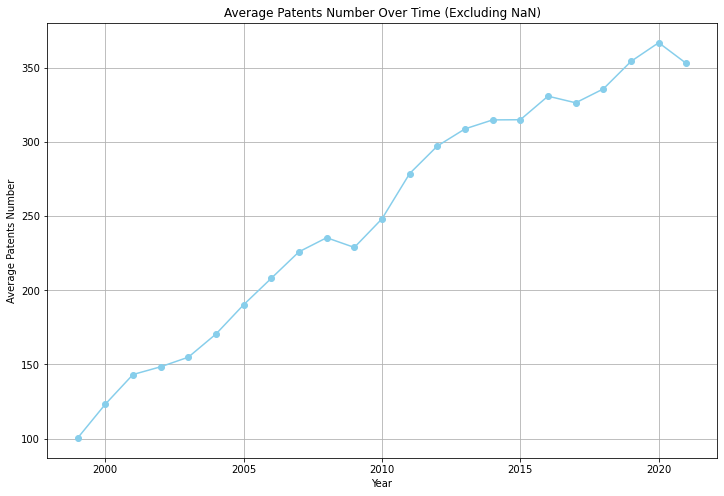

In [835]:
avg_patents_by_year =patents.groupby('Time')['patents_number'].mean().reset_index().dropna()

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot line chart
plt.plot(avg_patents_by_year['Time'], avg_patents_by_year['patents_number'], marker='o', linestyle='-', color='skyblue')

plt.title('Average Patents Number Over Time (Excluding NaN)')
plt.xlabel('Year')
plt.ylabel('Average Patents Number')
plt.grid(True)  # Add grid for better readability
plt.show()

In [836]:
# Display basic information about the DataFrame
print("DataFrame Info:")
print(patents.info())

# Summary statistics
print("\nSummary Statistics:")
print(patents.describe())

# Check for missing values
print("\nMissing Values:")
print(patents.isnull().sum())

# Check unique values in 'Country' column
print("\nUnique Countries:")
print(patents['Country'].unique())

# Check unique values in 'Time' column
print("\nUnique Time Points:")
print(patents['Time'].unique())

# # Distribution of patents_number
# plt.figure(figsize=(10, 6))
# sns.histplot(patents['patents_number'], bins=10, kde=True)
# plt.title('Distribution of Patents Number')
# plt.xlabel('Patents Number')
# plt.ylabel('Frequency')
# plt.show()

# # Box plot to visualize the spread of patents_number
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Country', y='patents_number', data=patents)
# plt.title('Box Plot of Patents Number by Country')
# plt.xlabel('Country')
# plt.ylabel('Patents Number')
# plt.show()

# # Line plot to visualize changes over time
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='Time', y='patents_number', hue='Country', data=patents)
# plt.title('Patents Number Over Time by Country')
# plt.xlabel('Time')
# plt.ylabel('Patents Number')
# plt.show()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19534 entries, 0 to 19749
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         19534 non-null  string 
 1   patents_number  19534 non-null  float64
 2   Time            19534 non-null  int64  
dtypes: float64(1), int64(1), string(1)
memory usage: 610.4 KB
None

Summary Statistics:
       patents_number          Time
count    19534.000000  19534.000000
mean       251.929162   2010.134432
std       2434.695894      6.658674
min          0.000000   1999.000000
25%          0.000000   2004.000000
50%          1.000000   2010.000000
75%         15.000000   2016.000000
max      63766.802400   2021.000000

Missing Values:
Country           0
patents_number    0
Time              0
dtype: int64

Unique Countries:
<StringArray>
[                            'australia',
                               'austria',
                               

# Catastrophy

In [837]:
#let's play with the catastrophy dataset
cata.describe()

,AID Contribution ('000 US$),Magnitude,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,...,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI
count,4.810000e+02,3.315000e+03,1804.000000,1804.000000,9781.000000,9712.000000,8356.000000,9781.000000,9622.000000,8418.000000,...,6.386000e+03,1.205000e+03,7.876000e+03,3.000000e+01,2.700000e+01,6.880000e+02,6.810000e+02,3.025000e+03,2.983000e+03,9504.000000
mean,2.894168e+04,4.910028e+04,16.436270,41.770847,2010.939679,6.387150,15.150072,2010.989163,6.581376,15.870634,...,7.013751e+05,3.384869e+04,5.747689e+05,6.149345e+06,3.245456e+06,1.299015e+06,1.632017e+06,1.101577e+06,1.385305e+06,75.598285
std,2.136265e+05,2.798597e+05,21.799873,75.570844,7.035249,3.382679,9.043017,7.036850,3.346649,8.913669,...,7.182814e+06,2.246830e+05,6.475121e+06,1.826331e+07,5.030913e+06,4.603440e+06,5.769464e+06,6.290534e+06,8.085126e+06,11.036263
min,3.000000e+00,-5.700000e+01,-72.640000,-172.095000,2000.000000,1.000000,1.000000,2000.000000,1.000000,1.000000,...,1.000000e+00,3.000000e+00,1.000000e+00,8.400000e+01,1.260000e+02,3.400000e+01,4.600000e+01,0.000000e+00,0.000000e+00,58.840648
25%,1.610000e+02,7.700000e+00,1.061500,-0.315000,2005.000000,4.000000,7.000000,2005.000000,4.000000,8.000000,...,1.071750e+03,3.500000e+02,6.000000e+02,1.068870e+05,1.391450e+05,7.225000e+04,9.394800e+04,1.500000e+04,2.033900e+04,66.731058
50%,7.610000e+02,1.990000e+02,18.550000,53.950500,2010.000000,7.000000,15.000000,2011.000000,7.000000,16.000000,...,9.412000e+03,1.995000e+03,5.046000e+03,5.515000e+05,6.745680e+05,2.460000e+05,3.305590e+05,1.000000e+05,1.306550e+05,74.509444
75%,5.018000e+03,2.173700e+04,34.786750,103.012750,2017.000000,9.000000,23.000000,2017.000000,9.000000,24.000000,...,7.545450e+04,8.000000e+03,5.000000e+04,4.736000e+06,3.106949e+06,8.000000e+05,1.040832e+06,5.000000e+05,6.710560e+05,83.757255
max,3.518530e+06,1.302587e+07,67.930000,179.650000,2023.000000,12.000000,31.000000,2023.000000,12.000000,31.000000,...,3.300000e+08,5.000000e+06,3.300000e+08,1.000000e+08,1.543428e+07,6.000000e+07,8.991316e+07,2.100000e+08,2.732184e+08,100.000000


In [838]:
cata.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [839]:
#Select only the needed columns
cata['Duration in days'] = cata['End Day'] - cata['Start Day']

catastrophy = cata[["Country", "Disaster Type", 'Start Year','Duration in days','Total Deaths',"Total Affected", "Total Damage, Adjusted ('000 US$)"]]
catastrophy.head(20)

,Country,Disaster Type,Start Year,Duration in days,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,Djibouti,Drought,2001,NaN,NaN,100000.0,NaN
1,Sudan,Drought,2000,NaN,NaN,2000000.0,NaN
2,Somalia,Drought,2000,NaN,21.0,1200000.0,NaN
3,Angola,Flood,2000,7.0,31.0,70000.0,16995.0
4,Bangladesh,Extreme temperature,2000,NaN,49.0,NaN,NaN
5,Guatemala,Volcanic activity,2000,0.0,NaN,800.0,NaN
6,Iran (Islamic Republic of),Storm,2000,0.0,3.0,5500.0,NaN
7,Mozambique,Flood,2000,1.0,800.0,4500000.0,712433.0
8,South Africa,Wildfire,2000,4.0,NaN,1250.0,16995.0
9,Brazil,Flood,2000,5.0,26.0,70000.0,NaN


In [840]:
#drop line empty to focus only on extreme events
# catastrophy_complete1 = catastrophy.dropna(subset=["Total Damage, Adjusted ('000 US$)"])
# catastrophy_complete2 = catastrophy_complete1.dropna(subset=['Total Deaths'])
# print(catastrophy_complete2)


catastrophy["Total Affected"].isna().sum()


1905

In [841]:
#to get rid of the 2021 and 2022 years to merge with patent
# Cata20 = catastrophy_complete2[(catastrophy_complete2['Start Year'] != 2021) & (catastrophy_complete2['Start Year'] != 2022)]
# Cata20['Start Year'].unique()

In [842]:
#control all the value in Disaster Type
unique_disaster_types = catastrophy['Disaster Type'].unique()
print(unique_disaster_types)

['Drought' 'Flood' 'Extreme temperature' 'Volcanic activity' 'Storm'
 'Wildfire' 'Earthquake' 'Epidemic' 'Mass movement (wet)' 'Infestation'
 'Mass movement (dry)' 'Impact' 'Animal incident'
 'Glacial lake outburst flood']


In [843]:
#keep only the value that we want to study in the data set
cata_keep = ['Drought','Flood','Extreme temperature','Volcanic activity','Storm',
 'Wildfire','Earthquake' ,'Epidemic' ,'Mass movement (wet)', 'Infestation'
 ,'Mass movement (dry)' 'Impact' ,'Animal incident',
 'Glacial lake outburst flood']
# cata_keep = ['Drought', 'Flood', 'Storm','Extreme temperature', 'Earthquake','Volcanic activity']

#cata_keep = [x.lower() for x in cata_keep]

catastrophy_complete_filt = catastrophy[catastrophy['Disaster Type'].isin(cata_keep)]
catastrophy['Disaster Type'] = catastrophy['Disaster Type'].str.lower()
#catastrophy_complete_filt = Cata20[catastrophy_complete2['Disaster Type'].isin(cata_keep)]

catastrophy_complete_filt['Disaster Type'].unique()
# catastrophy_complete_filt['Start Year'].unique()

#convert country in lower letters
catastrophy_complete_filt['Country'] = catastrophy_complete_filt['Country'].str.lower().astype("string")
catastrophy_complete_filt['Disaster Type'] = catastrophy_complete_filt['Disaster Type'].str.lower().astype("string")
catastrophy_complete_filt['Country'].unique()

catastrophy_complete_filt.rename(columns={'Start Year': 'Year'}, inplace=True)

catastrophy_complete_filt['Disaster Type'].unique()


C:\Users\giamm\AppData\Local\Temp\ipykernel_22044\388527459.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catastrophy['Disaster Type'] = catastrophy['Disaster Type'].str.lower()
C:\Users\giamm\AppData\Local\Temp\ipykernel_22044\388527459.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catastrophy_complete_filt['Country'] = catastrophy_complete_filt['Country'].str.lower().astype("string")
C:\Users\giamm\AppData\Local\Temp\ipykernel_22044\388527459.py:19: SettingWithCopyWarning: 
A value is trying

<StringArray>
[                    'drought',                       'flood',
         'extreme temperature',           'volcanic activity',
                       'storm',                    'wildfire',
                  'earthquake',                    'epidemic',
         'mass movement (wet)',                 'infestation',
             'animal incident', 'glacial lake outburst flood']
Length: 12, dtype: string

In [844]:
# #control if the remaining value are only the one we need
# unique_disaster_types2 = catastrophy_complete_filt['Disaster Type'].unique()
# print(unique_disaster_types2)

In [845]:
#let's have a look to what is behind the new data
catastrophy_complete_filt

,Country,Disaster Type,Year,Duration in days,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,djibouti,drought,2001,NaN,NaN,100000.0,NaN
1,sudan,drought,2000,NaN,NaN,2000000.0,NaN
2,somalia,drought,2000,NaN,21.0,1200000.0,NaN
3,angola,flood,2000,7.0,31.0,70000.0,16995.0
4,bangladesh,extreme temperature,2000,NaN,49.0,NaN,NaN
...,...,...,...,...,...,...,...
9776,honduras,storm,2023,7.0,4.0,46658.0,NaN
9777,somalia,flood,2023,NaN,32.0,1240000.0,NaN
9778,honduras,drought,2023,NaN,NaN,10300.0,NaN
9779,spain,drought,2023,NaN,NaN,NaN,NaN


In [846]:
#let's have only the value above the median because the distirbution is skwed when comparing mean and median
#we check the number of country above the median
#we take above the median to only have extreme events

cata_above_mediane = catastrophy_complete_filt[catastrophy_complete_filt['Total Deaths'] > catastrophy_complete_filt['Total Deaths'].median()]

#print(f"Nombre de valeurs au-dessus de la moyenne : {count_above_mean}")
print(cata_above_mediane["Country"].unique())

cata_above_mediane.head(30)


<StringArray>
[     'somalia',       'angola',   'bangladesh',   'mozambique',
       'brazil',        'india',      'romania',  'philippines',
 'south africa',        'congo',
 ...
      'albania',       'cyprus',      'denmark',      'estonia',
      'finland',      'ireland',        'malta',   'montenegro',
       'norway',       'sweden']
Length: 169, dtype: string


,Country,Disaster Type,Year,Duration in days,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
2,somalia,drought,2000,NaN,21.0,1200000.0,NaN
3,angola,flood,2000,7.0,31.0,70000.0,16995.0
4,bangladesh,extreme temperature,2000,NaN,49.0,NaN,NaN
7,mozambique,flood,2000,1.0,800.0,4500000.0,712433.0
9,brazil,flood,2000,5.0,26.0,70000.0,NaN
10,india,extreme temperature,2000,NaN,275.0,NaN,NaN
13,romania,storm,2000,NaN,14.0,300.0,NaN
18,philippines,flood,2000,-27.0,50.0,153885.0,6934.0
20,south africa,flood,2000,1.0,83.0,200.0,271921.0
25,congo,epidemic,2000,NaN,24.0,NaN,NaN


## Play with the data not useful for merging

In [847]:
# #tester de grouper par pays
# grouped_pays = catastrophy_complete_filt.groupby('Country', as_index=False).sum()
# grouped_pays.head(30)

In [848]:
# catastrophy_complete_filt.dtypes

In [849]:
# #test with a bar plot how distirbuted it is regarding the death rate
# plt.figure(figsize=(20, 6))
# sns.barplot(x=grouped_pays.index, y='Total Deaths', data=grouped_pays)

# plt.xlabel('')
# plt.ylabel('Total Deaths')
# plt.title('Bar Plot for Total Deaths')
# plt.xticks(rotation=90)

# plt.show()

In [850]:
# catastrophy_complete_filt['Start Year'] = catastrophy_complete_filt['Start Year'].astype('int')

In [851]:
# catastrophy_complete_filt.dtypes

In [852]:
# #test regarding the years
# grouped_years = catastrophy_complete_filt.groupby('Start Year', as_index=False).sum()
# grouped_years.head(30)

In [853]:
# grouped_years.columns

In [854]:
# #test with a bar plot how distirbuted it is regarding the years
# plt.figure(figsize=(20, 6))
# sns.barplot(x=grouped_years['Start Year'], y='Total Deaths', data=grouped_years)

# plt.xlabel('Start Year')
# plt.ylabel('Total Deaths')
# plt.title('Bar Plot for Start Year')

# plt.show()

# #Graphe analysis
# #In 2004, one of the deadliest natural disasters in recorded history occurred: the Indian Ocean tsunami on December 26. Triggered by a massive undersea earthquake off the coast of Sumatra, Indonesia, the tsunami resulted in the loss of approximately 230,000 to 280,000 lives across several countries in the Indian Ocean region.

# #In 2008, there were several significant natural disasters that caused substantial damage, but in terms of high casualties, one of the notable events was the Sichuan earthquake in China on May 12. This earthquake, with a magnitude of 7.9, resulted in around 87,000 casualties, with many more injured and millions displaced.

# #In 2010, one of the major catastrophes was the Haiti earthquake on January 12. The earthquake, with a magnitude of 7.0, devastated the capital city of Port-au-Prince and surrounding areas, causing widespread destruction and leading to an estimated 230,000 deaths.


In [855]:
#let's now check the impact on only major events influenced by human
cata_human = ['Drought', 'Flood', 'Storm']

# cata_human = [x.lower() for x in cata_human]

catastrophy_human_filt = catastrophy_complete_filt[catastrophy_complete_filt['Disaster Type'].isin(cata_human)]

catastrophy_human_filt.head(20)
#catastrophy_human_filt['Start Year'].unique()

,Country,Disaster Type,Year,Duration in days,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"


In [856]:
#Again let's groupby countries
grouped_payshuman = catastrophy_human_filt.groupby('Country', as_index=False).sum()
grouped_payshuman.head(30)

,Country,Year,Duration in days,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"


In [857]:
# #test with a bar plot how distirbuted it is regarding the death rate
# plt.figure(figsize=(20, 6))
# sns.barplot(x=grouped_payshuman.index, y='Total Deaths', data=grouped_payshuman)

# plt.xlabel('')
# plt.ylabel('Total Deaths')
# plt.title('Bar Plot for Total Deaths')
# plt.xticks(rotation=90)

# plt.show()

In [858]:
# #test regarding the years
# grouped_yearshuman = catastrophy_human_filt.groupby('Start Year', as_index=False).sum()
# grouped_yearshuman.head(30)

In [859]:
# #test with a bar plot how distirbuted it is regarding the years
# plt.figure(figsize=(20, 6))
# sns.barplot(x=grouped_yearshuman['Start Year'], y='Total Deaths', data=grouped_yearshuman)

# plt.xlabel('Start Year')
# plt.ylabel('Total Deaths')
# plt.title('Bar Plot for Start Year')

# #interpretation
# #In 2008, Myanmar (formerly known as Burma) experienced a devastating natural disaster known as Cyclone Nargis. On May 2nd and 3rd, Cyclone Nargis made landfall in the Irrawaddy Delta region, which is a densely populated area in Myanmar. The cyclone brought extremely powerful winds, heavy rainfall, and a storm surge that inundated low-lying areas.
# #Cyclone Nargis caused widespread destruction, resulting in significant loss of life and devastating infrastructure damage. The official death toll reported by the Myanmar government was around 138,000 people, with many more missing or displaced. However, independent assessments suggested that the actual death toll might have been significantly higher.

# GDP_WB

In [860]:
#Cleaning GDP WB
GDPCap =  GDPCap.drop(['Country Code',"Indicator Name","Indicator Code"], axis=1)
GDPCap['Country Name'] = GDPCap['Country Name'].str.lower().astype("string")  

In [861]:
GDPCap

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN
1,africa eastern and southern,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,207.945574,210.149894,223.040659,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
2,afghanistan,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
3,africa western and central,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,143.601581,128.049650,129.123648,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
4,angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.562199,3902.529820,3520.780421,3759.471040,4009.356038,4384.190404,4416.031322,4310.932984,5269.783901,5351.439542
262,"yemen, rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416267,1069.816997,893.716573,701.714878,693.816484,583.875663,603.707959,676.928385
263,south africa,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,813.508497,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.508112,6688.774746,5741.641249,7055.055176,6776.480077
264,zambia,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,398.557506,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.199836,1268.120941,956.831747,1137.344395,1487.907764


In [862]:
#only keeping the value after 2000 to 2020
# col_keep = list(range(0, 2)) + list(range(44, 65))

# GDPCap = GDPCap.iloc[:, col_keep]
# DGPCap.head(10)

selected_columns = [GDPCap.columns[0]] + [col for col in GDPCap.columns[1:] if int(col) > 1998]

GDP = GDPCap[selected_columns]
GDP

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,aruba,19833.826746,21023.157513,20913.299497,21377.095185,22050.830932,24104.646177,24975.673257,25833.445623,27665.426465,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN
1,africa eastern and southern,671.862171,709.061010,630.198869,630.479082,816.437662,989.220845,1124.220303,1230.194793,1374.086248,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720
2,afghanistan,NaN,NaN,NaN,183.532775,200.462376,221.657662,255.055107,274.000656,375.078261,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN
3,africa western and central,526.248227,522.772772,535.897917,621.862505,700.443384,843.989814,1003.436618,1245.822948,1420.840336,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800
4,angola,387.689415,556.884244,527.464118,872.657638,982.805590,1254.696126,1900.723817,2597.963585,3121.348735,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.562199,3902.529820,3520.780421,3759.471040,4009.356038,4384.190404,4416.031322,4310.932984,5269.783901,5351.439542
262,"yemen, rep.",421.821225,518.148673,515.139982,543.960981,583.391150,669.103362,785.451250,867.782937,956.230635,...,1497.747941,1557.601406,1488.416267,1069.816997,893.716573,701.714878,693.816484,583.875663,603.707959,676.928385
263,south africa,3267.939079,3241.661240,2867.472552,2708.423419,4095.683610,5268.278984,5893.186767,6139.581467,6662.062785,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.508112,6688.774746,5741.641249,7055.055176,6776.480077
264,zambia,353.830209,364.026126,401.732316,399.099078,452.286578,556.050007,720.446505,1065.596417,1133.436158,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.199836,1268.120941,956.831747,1137.344395,1487.907764


In [863]:
# Data Restructuration
data = [['Country Name', 'Year', 'GDPCap']]

for index, row in GDP.iterrows():
    pays = row['Country Name']
    for col in GDP.columns[1:]:
        annee = int(col)
        valeur = row[col]
        data.append([pays, annee, valeur])

# Create new dataframe with data Restructuration
gdp = pd.DataFrame(data[1:], columns=data[0])

# reset index to columns
gdp.reset_index(drop=True, inplace=True)

# Check the modified dataframe
gdp.head()

,Country Name,Year,GDPCap
0,aruba,1999,19833.826746
1,aruba,2000,21023.157513
2,aruba,2001,20913.299497
3,aruba,2002,21377.095185
4,aruba,2003,22050.830932


In [864]:
# #Split country above and under the gdp mediane
# keep = DGPCap_clean[2010.0].index[DGPCap_clean[2010.0] >= DGPCap_clean[2010.0].median()]
# gdp_above = DGPCap_clean.loc[keep]
# gdp_above = gdp_above['Country Name'].str.lower().astype('object').unique()
# print(gdp_above)

# print ('''

# ''')

# keep = DGPCap_clean[2010.0].index[DGPCap_clean[2010.0] <= DGPCap_clean[2010.0].median()]
# gdp_below = DGPCap_clean.loc[keep]
# gdp_below = gdp_below['Country Name'].str.lower().astype('object').unique()
# print(gdp_below)

## Play with graphe and GDP

In [865]:
# #split country above and under the GDP mediane

# keep = DGPCap_clean[2022.0].index[DGPCap_clean[2022.0] >= DGPCap_clean[2022.0].median()]
# GDP_above = DGPCap_clean.loc[keep]
# GDP_above.head(20)

# #median = DGPCap_clean[2022.0].median()
# #print(median)

In [866]:
# #take out all the country above the median
# liste = GDP_above['Country Name'].unique()
# list_above = liste.tolist()
# Country_above_GDP = [x.lower() for x in list_above]
# Country_above_GDP

In [867]:
# #testing the death in country above GDP

# cata_count_above = grouped_payshuman[grouped_payshuman['Country'].isin(Country_above_GDP)]

# cata_count_above.head(20)

In [868]:
# #test with a bar plot how distirbuted it is regarding the death rate for country above GDP
# plt.figure(figsize=(20, 6))
# sns.barplot(x=cata_count_above['Country'], y="Total Damage, Adjusted ('000 US$)", data=cata_count_above)

# plt.xlabel('')
# plt.ylabel("Total Damage ('000 US$)")
# plt.title('Bar Plot for Total Deaths')
# plt.xticks(rotation=90)

# plt.show()

In [869]:
# #split country below and under the GDP mediane

# keep1 = DGPCap_clean[2022.0].index[DGPCap_clean[2022.0] <= DGPCap_clean[2022.0].median()]
# GDP_below = DGPCap_clean.loc[keep1]
# GDP_below.head(20)

In [870]:
# #take out all the country below the median
# liste1 = GDP_below['Country Name'].unique()
# list_below = liste1.tolist()
# Country_below_GDP = [x.lower() for x in list_below]
# Country_below_GDP

In [871]:
# #testing the death in country below GDP

# cata_count_below = grouped_payshuman[grouped_payshuman['Country'].isin(Country_below_GDP)]

# cata_count_below.head(20)

In [872]:
# #test with a bar plot how distirbuted it is regarding the death rate for country above GDP
# plt.figure(figsize=(20, 6))
# sns.barplot(x=cata_count_below['Country'], y="Total Damage, Adjusted ('000 US$)", data=cata_count_below)

# plt.xlabel('')
# plt.ylabel("Total Damage ('000 US$)")
# plt.title('Bar Plot for Total Deaths')
# plt.xticks(rotation=90)

# plt.show()

## Cleaning FDI dataset

In [873]:
# FDI_WB.head()

In [874]:
FDI_WB = FDI_WB.drop(["Country Code", "Indicator Name", "Indicator Code","Unnamed: 67"],axis=1)
FDI_WB['Country Name'] = FDI_WB["Country Name"].str.lower()
selected_columns = [FDI_WB.columns[0]] + [col for col in FDI_WB.columns[1:] if int(col) > 1998]

FDI = FDI_WB[selected_columns]
FDI

,Country Name,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,aruba,4.675419e+08,-1.279330e+08,-2.669274e+08,3.325140e+08,1.597765e+08,-1.056983e+08,-2.077980e+08,2.203161e+08,-4.710056e+08,...,2.263714e+08,2.506181e+08,-2.877586e+07,2.755127e+07,1.624636e+08,1.359212e+08,-7.522654e+07,1.610670e+08,1.335451e+08,2.481503e+08
1,africa eastern and southern,6.254804e+09,4.315007e+09,1.220501e+10,6.464122e+09,8.555149e+09,7.979692e+09,1.033388e+10,7.234543e+09,1.612228e+10,...,2.153425e+10,2.768142e+10,2.877423e+10,1.666027e+10,1.010829e+10,1.358898e+10,1.486866e+10,1.285669e+10,5.279721e+10,1.807836e+10
2,afghanistan,6.040000e+06,1.700000e+05,6.800000e+05,5.000000e+07,5.780000e+07,1.869000e+08,2.710000e+08,2.380000e+08,1.886900e+08,...,4.831135e+07,4.297526e+07,1.691466e+08,9.359132e+07,5.153390e+07,1.194351e+08,2.340455e+07,1.297015e+07,2.060098e+07,NaN
3,africa western and central,2.391058e+09,2.560095e+09,3.224339e+09,4.408519e+09,5.262167e+09,4.653749e+09,9.278129e+09,9.202357e+09,1.303066e+10,...,1.915755e+10,1.659803e+10,1.564317e+10,1.393704e+10,1.766242e+10,1.549284e+10,1.245274e+10,1.075330e+10,1.735395e+10,1.258155e+10
4,angola,2.471460e+09,8.786200e+08,2.145470e+09,1.743504e+09,3.576972e+09,2.197228e+09,-1.303837e+09,-3.771486e+07,-8.933422e+08,...,-7.120017e+09,3.657515e+09,1.002822e+10,-1.795176e+08,-7.397295e+09,-6.456076e+09,-4.098479e+09,-1.866468e+09,-4.355117e+09,-6.598653e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,kosovo,NaN,NaN,NaN,NaN,NaN,5.338531e+07,1.338768e+08,3.701372e+08,6.040219e+08,...,3.714922e+08,1.998884e+08,3.433506e+08,2.437871e+08,2.868352e+08,3.185430e+08,2.850816e+08,3.946253e+08,5.009279e+08,8.114684e+08
262,"yemen, rep.",-3.076000e+08,6.399510e+06,1.551410e+08,1.143020e+08,-8.910700e+07,1.435780e+08,-3.020567e+08,1.120970e+09,9.173000e+08,...,-1.335709e+08,-2.331047e+08,-1.544481e+07,-5.610000e+08,-2.698500e+08,-2.820983e+08,-3.709828e+08,NaN,NaN,NaN
263,south africa,1.503332e+09,9.688314e+08,7.270345e+09,1.479805e+09,7.831361e+08,7.014220e+08,6.522098e+09,6.232917e+08,6.586792e+09,...,8.232519e+09,5.791659e+09,1.521140e+09,2.215307e+09,2.058580e+09,5.569462e+09,5.116098e+09,3.153553e+09,4.065879e+10,9.194808e+09
264,zambia,1.620000e+08,1.217000e+08,1.450000e+08,2.983900e+08,3.470000e+08,3.640400e+08,3.569400e+08,6.157900e+08,1.323900e+09,...,2.099800e+09,1.507800e+09,1.582667e+09,6.628139e+08,1.107520e+09,4.084385e+08,5.479679e+08,2.452055e+08,-2.714361e+08,1.080941e+07


In [875]:
data = [['Country Name', 'Year', 'FDI']]

for index, row in FDI.iterrows():
    pays = row['Country Name']
    for col in FDI.columns[1:]:
        annee = int(col)
        valeur = row[col]
        data.append([pays, annee, valeur])

# Create new dataframe with data Restructuration
fdi = pd.DataFrame(data[1:], columns=data[0])

# reset index to columns
fdi.reset_index(drop=True, inplace=True)

# Check the modified dataframe
fdi.head()

,Country Name,Year,FDI
0,aruba,1999,4.675419e+08
1,aruba,2000,-1.279330e+08
2,aruba,2001,-2.669274e+08
3,aruba,2002,3.325140e+08
4,aruba,2003,1.597765e+08


## Cleaning Government dataset

In [876]:
# #import governement information
government = pd.read_csv("dd492d4b-981b-41c4-9e4a-5ea2e92d4ed4_Data.csv")

In [877]:
#removing unnecessary columns
government = government.drop(["Country Code", "Series Code"],axis=1)

# Rename the columns using  mapping
government.rename(columns={col: col.split()[0] for col in government.columns if '[YR' in col}, inplace=True)


In [878]:
reframed_government = pd.melt(
    government,
    id_vars=['Country Name', 'Series Name'],
    var_name='Year',
    value_name='Value'
)

In [879]:
reframed_government['Year'] = reframed_government['Year'].astype('int64')
reframed_government = reframed_government[reframed_government['Year'] > 1998]
reframed_government['Country Name'] = reframed_government['Country Name'].str.lower().astype('string')
# Replace non-numeric values ('..') with NaN in the 'Value' column
reframed_government['Value'] = pd.to_numeric(reframed_government['Value'], errors='coerce')
reframed_government['Value'] = reframed_government['Value'].astype('float64')

reframed_government = reframed_government.dropna(subset=['Country Name'])
reframed_government = reframed_government.iloc[:-2]

# Keep only rows where 'Series Name' contains 'Estimate'
reframed_government['Series Name'] = reframed_government['Series Name'].fillna('').astype('string')
reframed_government = reframed_government[reframed_government['Series Name'].str.contains('Estimate')]
reframed_government['Series Name'] = reframed_government['Series Name'].str.replace(': Estimate', '')
reframed_government.rename(columns={'Country Name': 'Country'}, inplace=True)


In [880]:
reframed_government

,Country,Series Name,Year,Value
10710,afghanistan,Control of Corruption,2000,-1.271724
10716,afghanistan,Government Effectiveness,2000,-2.173946
10722,afghanistan,Political Stability and Absence of Violence/Te...,2000,-2.438969
10728,afghanistan,Regulatory Quality,2000,-2.080253
10734,afghanistan,Rule of Law,2000,-1.780661
...,...,...,...,...
128490,zimbabwe,Control of Corruption,2022,-1.255139
128496,zimbabwe,Government Effectiveness,2022,-1.254613
128502,zimbabwe,Political Stability and Absence of Violence/Te...,2022,-0.884500
128508,zimbabwe,Regulatory Quality,2022,-1.425967


## Cleaning climate_awareness dataset

In [881]:
#import climate worriness dataset (https://dataforgood.facebook.com/dfg/tools/climate-change-opinion-survey)
climate_awareness = pd.read_excel("climate_change_opinion_survey_2022_aggregated.xlsx",sheet_name = "climate_worry")

In [882]:
climate_awareness = climate_awareness.transpose()
climate_awareness.columns = climate_awareness.iloc[0]
climate_awareness = climate_awareness.iloc[1:]

In [883]:
climate_awareness['Country'] = climate_awareness.index
climate_awareness['Country'] = climate_awareness['Country'].str.lower() 
climate_awareness['Worriness'] = climate_awareness['Very worried'] + climate_awareness['Somewhat worried']
climate_awareness.reset_index(drop= True, inplace=True)

In [884]:
climate_awareness = climate_awareness[['Country',"Worriness"]]  
climate_awareness.rename_axis('', axis=1, inplace=True)
# climate_awareness

In [885]:
climate_awareness

,Country,Worriness
0,albania,81.680117
1,algeria,65.927619
2,angola,74.165504
3,argentina,84.59469
4,armenia,72.705038
...,...,...
105,uruguay,85.160842
106,uzbekistan,78.558349
107,vietnam,85.194041
108,yemen,31.703961


# Merging all datasets

In [886]:
merged = pd.merge(gdp, fdi, on=['Country Name', 'Year'], how='outer')

In [887]:
# merged[merged['GDPCap'].isna()]['Country Name'].unique()
# merged[merged['GDPCap'].isna()]['Country Name'].count()
# merged.isna().sum()

merged[merged['GDPCap'].isna() & merged['FDI'].isna()]['Country Name'].count()

163

In [888]:
merged.rename(columns={'Country Name': 'Country'}, inplace=True)

In [889]:
catastrophy_complete_filt

,Country,Disaster Type,Year,Duration in days,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,djibouti,drought,2001,NaN,NaN,100000.0,NaN
1,sudan,drought,2000,NaN,NaN,2000000.0,NaN
2,somalia,drought,2000,NaN,21.0,1200000.0,NaN
3,angola,flood,2000,7.0,31.0,70000.0,16995.0
4,bangladesh,extreme temperature,2000,NaN,49.0,NaN,NaN
...,...,...,...,...,...,...,...
9776,honduras,storm,2023,7.0,4.0,46658.0,NaN
9777,somalia,flood,2023,NaN,32.0,1240000.0,NaN
9778,honduras,drought,2023,NaN,NaN,10300.0,NaN
9779,spain,drought,2023,NaN,NaN,NaN,NaN


In [890]:
catastrophy_complete_filt['Disaster Type'].unique()

<StringArray>
[                    'drought',                       'flood',
         'extreme temperature',           'volcanic activity',
                       'storm',                    'wildfire',
                  'earthquake',                    'epidemic',
         'mass movement (wet)',                 'infestation',
             'animal incident', 'glacial lake outburst flood']
Length: 12, dtype: string

In [893]:
merged_V2 = pd.merge(merged, catastrophy_complete_filt, on=['Country', 'Year'], how='outer')

In [894]:
merged_V2.dtypes

Country                               object
Year                                   int64
GDPCap                               float64
FDI                                  float64
Disaster Type                         string
Duration in days                     float64
Total Deaths                         float64
Total Affected                       float64
Total Damage, Adjusted ('000 US$)    float64
dtype: object

In [895]:
merged_V3 = pd.merge(merged_V2, reframed_government, on=['Country', 'Year'], how='outer')
merged_V3.rename(columns={'Value': 'Gov_value'}, inplace=True)

In [896]:
merged_V4 = pd.merge(merged_V3,climate_awareness, on='Country', how='left')

In [897]:
patents.rename(columns={'Time':'Year'}, inplace=True)

C:\Users\giamm\AppData\Local\Temp\ipykernel_22044\542382635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patents.rename(columns={'Time':'Year'}, inplace=True)


In [898]:
merged_V5=pd.merge(merged_V4, patents, on=['Country','Year'], how='right')

In [899]:
merged_final = pd.merge(merged_V5, count,on='Country',how='left')

In [900]:
# merged_final = merged

In [901]:
# count nan values per column
nan_count_per_column = merged_final.isna().sum()

# Display the count of NaN values in each column
print(nan_count_per_column)

Country                                   0
Year                                      0
GDPCap                                 3289
FDI                                    7698
Disaster Type                         35650
Duration in days                      57978
Total Deaths                          85147
Total Affected                        73839
Total Damage, Adjusted ('000 US$)    152794
Series Name                            5599
Gov_value                              5966
Worriness                             24820
patents_number                            0
patience                              49101
risktaking                            49101
dtype: int64


In [902]:
merged_final = merged_final.dropna(subset=['Disaster Type'])

In [903]:
# remuving duplicates of GOV value 
merged_nodup = merged_final.drop_duplicates(subset=merged_final.columns[:9], keep='first')
merged_nodup

,Country,Year,GDPCap,FDI,Disaster Type,Duration in days,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Series Name,Gov_value,Worriness,patents_number,patience,risktaking
1,australia,2000,21853.449993,1.489298e+10,storm,-14.0,1.0,200.0,152955.0,Control of Corruption,1.862088,72.991429,1511.85,0.657004,0.137137
6,australia,2000,21853.449993,1.489298e+10,storm,0.0,NaN,400.0,101970.0,Control of Corruption,1.862088,72.991429,1511.85,0.657004,0.137137
11,australia,2000,21853.449993,1.489298e+10,infestation,NaN,NaN,NaN,203941.0,Control of Corruption,1.862088,72.991429,1511.85,0.657004,0.137137
16,australia,2000,21853.449993,1.489298e+10,wildfire,NaN,NaN,200.0,NaN,Control of Corruption,1.862088,72.991429,1511.85,0.657004,0.137137
21,australia,2000,21853.449993,1.489298e+10,flood,-15.0,NaN,600.0,450369.0,Control of Corruption,1.862088,72.991429,1511.85,0.657004,0.137137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116546,pakistan,2021,1505.010193,2.147000e+09,flood,1.0,5.0,97.0,NaN,Control of Corruption,-0.809737,66.289337,0.00,-0.083108,0.019619
116551,pakistan,2021,1505.010193,2.147000e+09,flood,2.0,19.0,4.0,NaN,Control of Corruption,-0.809737,66.289337,0.00,-0.083108,0.019619
116556,pakistan,2021,1505.010193,2.147000e+09,earthquake,0.0,21.0,64100.0,NaN,Control of Corruption,-0.809737,66.289337,0.00,-0.083108,0.019619
116561,pakistan,2021,1505.010193,2.147000e+09,epidemic,13.0,NaN,2728.0,NaN,Control of Corruption,-0.809737,66.289337,0.00,-0.083108,0.019619


In [930]:
# create dummy variable to separate human-related events 
merged_nodup['dummy_event'] = merged_nodup['Disaster Type'].apply(lambda x: 0 if x in ['storm', 'flood', 'drought', 'extreme temperature', 'glacial lake outburst flood'] else 1)

C:\Users\giamm\AppData\Local\Temp\ipykernel_22044\1397378049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_nodup['dummy_event'] = merged_nodup['Disaster Type'].apply(lambda x: 0 if x in ['storm', 'flood', 'drought', 'extreme temperature', 'glacial lake outburst flood'] else 1)


In [931]:
merged_nodup

,Country,Year,GDPCap,FDI,Disaster Type,Duration in days,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Series Name,Gov_value,Worriness,patents_number,patience,risktaking,dummy_event
1,australia,2000,21853.449993,1.489298e+10,storm,-14.0,1.0,200.0,152955.0,Control of Corruption,1.862088,72.991429,1511.85,0.657004,0.137137,0
6,australia,2000,21853.449993,1.489298e+10,storm,0.0,NaN,400.0,101970.0,Control of Corruption,1.862088,72.991429,1511.85,0.657004,0.137137,0
11,australia,2000,21853.449993,1.489298e+10,infestation,NaN,NaN,NaN,203941.0,Control of Corruption,1.862088,72.991429,1511.85,0.657004,0.137137,1
16,australia,2000,21853.449993,1.489298e+10,wildfire,NaN,NaN,200.0,NaN,Control of Corruption,1.862088,72.991429,1511.85,0.657004,0.137137,1
21,australia,2000,21853.449993,1.489298e+10,flood,-15.0,NaN,600.0,450369.0,Control of Corruption,1.862088,72.991429,1511.85,0.657004,0.137137,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116546,pakistan,2021,1505.010193,2.147000e+09,flood,1.0,5.0,97.0,NaN,Control of Corruption,-0.809737,66.289337,0.00,-0.083108,0.019619,0
116551,pakistan,2021,1505.010193,2.147000e+09,flood,2.0,19.0,4.0,NaN,Control of Corruption,-0.809737,66.289337,0.00,-0.083108,0.019619,0
116556,pakistan,2021,1505.010193,2.147000e+09,earthquake,0.0,21.0,64100.0,NaN,Control of Corruption,-0.809737,66.289337,0.00,-0.083108,0.019619,1
116561,pakistan,2021,1505.010193,2.147000e+09,epidemic,13.0,NaN,2728.0,NaN,Control of Corruption,-0.809737,66.289337,0.00,-0.083108,0.019619,1


In [906]:
merged_final

,Country,Year,GDPCap,FDI,Disaster Type,Duration in days,Total Deaths,Total Affected,"Total Damage, Adjusted ('000 US$)",Series Name,Gov_value,Worriness,patents_number,patience,risktaking
1,australia,2000,21853.449993,1.489298e+10,storm,-14.0,1.0,200.0,152955.0,Control of Corruption,1.862088,72.991429,1511.85,0.657004,0.137137
2,australia,2000,21853.449993,1.489298e+10,storm,-14.0,1.0,200.0,152955.0,Government Effectiveness,1.732170,72.991429,1511.85,0.657004,0.137137
3,australia,2000,21853.449993,1.489298e+10,storm,-14.0,1.0,200.0,152955.0,Political Stability and Absence of Violence/Te...,1.333965,72.991429,1511.85,0.657004,0.137137
4,australia,2000,21853.449993,1.489298e+10,storm,-14.0,1.0,200.0,152955.0,Regulatory Quality,1.575613,72.991429,1511.85,0.657004,0.137137
5,australia,2000,21853.449993,1.489298e+10,storm,-14.0,1.0,200.0,152955.0,Rule of Law,1.722067,72.991429,1511.85,0.657004,0.137137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209079,zimbabwe,2021,1773.920411,2.500000e+08,drought,NaN,NaN,167500.0,NaN,Control of Corruption,-1.253550,NaN,0.00,-0.238587,0.523195
209080,zimbabwe,2021,1773.920411,2.500000e+08,drought,NaN,NaN,167500.0,NaN,Government Effectiveness,-1.304817,NaN,0.00,-0.238587,0.523195
209081,zimbabwe,2021,1773.920411,2.500000e+08,drought,NaN,NaN,167500.0,NaN,Political Stability and Absence of Violence/Te...,-0.954426,NaN,0.00,-0.238587,0.523195
209082,zimbabwe,2021,1773.920411,2.500000e+08,drought,NaN,NaN,167500.0,NaN,Regulatory Quality,-1.386109,NaN,0.00,-0.238587,0.523195


# Correlation analysis

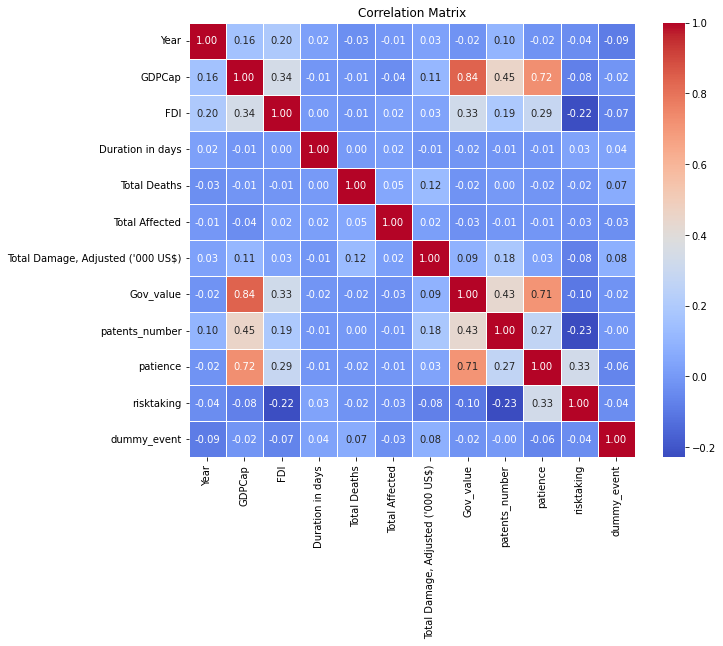

In [907]:
import seaborn as sns
import matplotlib.pyplot as plt


# numeric_columns = merged_final.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = merged_nodup.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Merging cleaning Cata and Patent

In [908]:
# #Group the columns with catasrophy sample and keep all as columns

# Catagrouped_above = cata_above_mediane.groupby(['Country', 'Disaster Type', 'Year']).agg({
#     "Total Damage, Adjusted ('000 US$)": 'sum',
#     'Total Deaths': 'sum'
# }).reset_index()

# #Seconde group to count the number of lines per group
# count_per_group = cata_above_mediane.groupby(['Country', 'Disaster Type', 'Year']).size().reset_index(name='Count')

# #Merge both results
# Catagrouped_above = Catagrouped_above.merge(count_per_group, on=['Country', 'Disaster Type', 'Year'])

# Catagrouped_above.head(60)

In [909]:
# #NOT USEFULL ANYMORE : create speparate dataframe for each catastrophy
# drought_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'drought'].copy()
# storm_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'storm'].copy()
# flood_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'flood'].copy()
# earthquake_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'earthquake'].copy()
# Volcanic_activity_above = Catagrouped_above[Catagrouped_above['Disaster Type'] == 'Volcanic activity'].copy()
# print(flood_above)

In [910]:
# #check new dataframe are ok
# nombre_drought = Catagrouped_above['Disaster Type'].value_counts()['flood']
# print(nombre_drought)

In [911]:
# #Prepare dataframe to merge
# pat20.loc[:, 'Country'] = pat20['Country'].astype('object')

In [912]:
# flood_above.dtypes
# pat20.dtypes

In [913]:
# #Prepare dataframe to merge change row name to merge regarding country and years
# pat20.rename(columns=lambda x: x.strip() if x == 'Time ' else x, inplace=True)

# pat20.rename(columns={'Time': 'Year'}, inplace=True)
# #pat20.rename(columns={'Time ': 'Start Year'}, inplace=True)

In [914]:
# #change the order to merge
# new_order = ['Country', 'Year', 'patents_number']
# pat20 = pat20.reindex(columns=new_order)

#Merging Cata, Patent and GDP

In [915]:
# pat20.dtypes

In [916]:
# #create one big dataset with catastrophy (considered as above average therefore severe), patent, and GDP
# dataset_1 =pd.merge(Catagrouped_above, pat20, on=['Country', 'Year'], how='left')
# dataset = pd.merge(dataset_1,gdp, on=['Country', 'Year'], how='left')
# dataset.head(100)

In [917]:
# #Check if ok
# dataset['patents_number'].count()

In [918]:
# #drop 'NaN' in patent_number
# ds = dataset.dropna(subset=['patents_number'])
# ds.head(20)

In [919]:
# ds['Country'].unique()

In [920]:
# #check what is inside
# ds['Country'].unique()
# ds['Year'].unique()
# ds['Country'].count()

#EDA

In [921]:
# #check correlation between columns
# corr_ds = ds.corr()

# display(corr_ds)

In [922]:
# #cut Above and under the mediane GDP regarding 2010 as a baseline to cut --> come frome subpart GDP initial dataset

# below = gdp_below
# ds_below = ds[ds['Country'].isin(below)]

# above = gdp_above
# ds_above = ds[ds['Country'].isin(above)]

# ds_below.head(20)
# ds_above.head(20)

In [923]:
# ds_below['Country'].count()

In [924]:
# #check corr above and below to spot if differences
# corr_ds_below = ds_below.corr()
# corr_ds_above = ds_above.corr()

# display(corr_ds_below)
# print()
# display(corr_ds_above)

In [925]:
# #check only for flood difference above and under --> human related
# flood_below = ds_below[ds_below['Disaster Type'] == 'flood']
# flood_above = ds_above[ds_above['Disaster Type'] == 'flood']

# corr_flood_below = flood_below.corr()
# corr_flood_above = flood_above.corr()

# display(corr_flood_below)
# print()
# display(corr_flood_above)

In [926]:
# #check if significative to use Normal > 30 obs
# flood_below['Country'].count()
# #flood_above['Country'].count()

In [927]:
# #check only for earthquake difference above and under --> non human related
# earthquake_below = ds_below[ds_below['Disaster Type'] == 'earthquake']
# earthquake_above = ds_above[ds_above['Disaster Type'] == 'earthquake']

# corr_earthquake_below = earthquake_below.corr()
# corr_earthquake_above = earthquake_above.corr()

# display(corr_earthquake_below)
# print()
# display(corr_earthquake_above)

In [928]:
# #check if significative to use Normal > 30 obs --> not enough to be significative !!!
# earthquake_below['Country'].count()
# earthquake_above['Country'].count()

In [929]:
# #check based on all human related cata
# human_below = ds_below[(ds_below['Disaster Type'] != "earthquake") & (ds_below['Disaster Type'] != "volcanic activity")]

# human_above = ds_above[(ds_above['Disaster Type'] != "earthquake") & (ds_above['Disaster Type'] != "volcanic activity")]


# corr_human_below = human_below.corr()
# corr_human_above = human_above.corr()

# display(corr_human_below)
# print()
# display(corr_human_above)
